In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
from matplotlib.offsetbox import AnchoredText

In [2]:
sys.path.append("../")

In [3]:
df = pd.read_csv('../data/medidas_coche.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     388 non-null    int64  
 1   distance       388 non-null    float64
 2   consume        388 non-null    float64
 3   speed          388 non-null    int64  
 4   temp_inside    376 non-null    object 
 5   temp_outside   388 non-null    int64  
 6   specials       388 non-null    object 
 7   gas_type       388 non-null    object 
 8   ac             388 non-null    int64  
 9   rain           388 non-null    int64  
 10  sun            388 non-null    int64  
 11  refill_liters  13 non-null     object 
 12  refill_gas     13 non-null     object 
 13  consumo_abs    388 non-null    float64
 14  CO2            388 non-null    float64
 15  CO2_km         388 non-null    float64
 16  speed_range    388 non-null    object 
 17  temp_o_range   387 non-null    object 
 18  gasto     

In [5]:
df.specials.value_counts()

Otro        295
Rain         32
Sun          27
AC           14
AC Rain      10
AC Sun        5
Snow          3
Rain_Sun      1
AC Snow       1
Name: specials, dtype: int64

In [6]:
clima = df.consume.groupby(df.specials).mean().sort_values()

In [7]:
df.consume.groupby(df.specials).mean().sort_values()

specials
Sun         4.277778
AC Sun      4.580000
AC          4.685714
Rain_Sun    4.700000
Otro        4.900678
Snow        5.166667
AC Rain     5.450000
Rain        5.453125
AC Snow     7.100000
Name: consume, dtype: float64

In [8]:
df.corr()

,Unnamed: 0,distance,consume,speed,temp_outside,ac,rain,sun,consumo_abs,CO2,CO2_km,gasto,gasto_medio
Unnamed: 0,1.000000,0.103662,-0.344622,0.058154,0.701780,0.133447,-0.117062,0.279471,0.054453,0.054453,-0.344622,0.057137,-0.322566
distance,0.103662,1.000000,-0.128967,0.562299,0.088175,-0.025738,-0.019791,0.081120,0.992101,0.992101,-0.128967,0.990766,-0.134212
consume,-0.344622,-0.128967,1.000000,-0.227866,-0.320811,0.096591,0.248118,-0.170667,-0.052188,-0.052188,1.000000,-0.051932,0.991173
speed,0.058154,0.562299,-0.227866,1.000000,0.015411,-0.035408,0.009489,0.081618,0.551847,0.551847,-0.227866,0.546335,-0.238150
temp_outside,0.701780,0.088175,-0.320811,0.015411,1.000000,0.167562,-0.186315,0.346903,0.037877,0.037877,-0.320811,0.040332,-0.298929
ac,0.133447,-0.025738,0.096591,-0.035408,0.167562,1.000000,0.242915,0.088598,-0.018700,-0.018700,0.096591,-0.017260,0.110664
rain,-0.117062,-0.019791,0.248118,0.009489,-0.186315,0.242915,1.000000,-0.112650,0.009125,0.009125,0.248118,0.011624,0.254084
sun,0.279471,0.081120,-0.170667,0.081618,0.346903,0.088598,-0.112650,1.000000,0.064247,0.064247,-0.170667,0.065775,-0.166433
consumo_abs,0.054453,0.992101,-0.052188,0.551847,0.037877,-0.018700,0.009125,0.064247,1.000000,1.000000,-0.052188,0.999387,-0.058405
CO2,0.054453,0.992101,-0.052188,0.551847,0.037877,-0.018700,0.009125,0.064247,1.000000,1.000000,-0.052188,0.999387,-0.058405


In [9]:
df_2 = df.consume.groupby(df.specials).mean().sort_values()
valores = df.consume.groupby(df.speed_range).median()

In [10]:
df.CO2_km.groupby(df.gas_type).median()

gas_type
E10     110.4
SP98    108.1
Name: CO2_km, dtype: float64

In [11]:
valores

speed_range
(0, 30]     5.2
(30, 60]    4.6
(60, 90]    4.9
Name: consume, dtype: float64

In [12]:
df_2

specials
Sun         4.277778
AC Sun      4.580000
AC          4.685714
Rain_Sun    4.700000
Otro        4.900678
Snow        5.166667
AC Rain     5.450000
Rain        5.453125
AC Snow     7.100000
Name: consume, dtype: float64

In [15]:
df['temp_o_range'] = pd.cut(df.temp_outside, bins=[-5, 0, 5, 10, 15, 20, 25, 30, 35])

In [16]:
df.temp_o_range.unique()

[(10.0, 15.0], (5.0, 10.0], (0.0, 5.0], (-5.0, 0.0], (15.0, 20.0], NaN, (20.0, 25.0], (25.0, 30.0], (30.0, 35.0]]
Categories (8, interval[int64]): [(-5, 0] < (0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25] < (25, 30] < (30, 35]]

In [17]:
temperaturas = df.consume.groupby(df.temp_o_range).mean()
temperaturas

temp_o_range
(-5, 0]     5.190909
(0, 5]      5.391935
(5, 10]     5.174046
(10, 15]    4.789744
(15, 20]    4.354237
(20, 25]    4.317241
(25, 30]    4.421429
(30, 35]    4.633333
Name: consume, dtype: float64

In [19]:
emisiones = df.CO2_km.groupby(df.speed_range).mean()
emisiones

speed_range
(0, 30]     130.567073
(30, 60]    107.638321
(60, 90]    113.706250
Name: CO2_km, dtype: float64

In [20]:
hues = df.consume.groupby([df.speed_range, df.specials]).mean()
hues = hues.fillna(0)
hues

speed_range  specials
(0, 30]      AC          5.533333
             AC Rain     5.920000
             Otro        5.719672
             Rain        6.485714
             Sun         4.166667
(30, 60]     AC          4.454545
             AC Rain     4.700000
             AC Snow     7.100000
             AC Sun      4.633333
             Otro        4.667453
             Rain        5.165000
             Rain_Sun    4.700000
             Snow        5.166667
             Sun         4.260000
(60, 90]     AC Rain     5.400000
             AC Sun      4.500000
             Otro        4.877273
             Rain        5.160000
             Sun         5.300000
Name: consume, dtype: float64

In [21]:
df.consume.groupby(df.temp_o_range).median()

temp_o_range
(-5, 0]     4.90
(0, 5]      5.10
(5, 10]     5.00
(10, 15]    4.65
(15, 20]    4.30
(20, 25]    4.20
(25, 30]    4.30
(30, 35]    4.60
Name: consume, dtype: float64

In [22]:
df.consume.groupby([df.gas_type, df.speed_range]).mean()

gas_type  speed_range
E10       (0, 30]        5.490323
          (30, 60]       4.785088
          (60, 90]       4.886667
SP98      (0, 30]        5.790196
          (30, 60]       4.605000
          (60, 90]       4.994118
Name: consume, dtype: float64

In [23]:
gas_type_01 = df[df.gas_type == 'E10']
gas_type_02 = df[df.gas_type == 'SP98']
E10_gas = gas_type_01.consume.groupby(gas_type_01.speed_range).median()
SP98_gas = gas_type_02.consume.groupby(gas_type_02.speed_range).median()

In [24]:
gasto_E10_gas = gas_type_01.gasto.groupby(gas_type_01.speed_range).median()
gasto_SP98_gas = gas_type_02.gasto.groupby(gas_type_02.speed_range).median()

In [25]:
gastom_E10_gas = gas_type_01.gasto_medio.groupby(gas_type_01.speed_range).median()
gastom_SP98_gas = gas_type_02.gasto_medio.groupby(gas_type_02.speed_range).median()

[Text(0, 0, '(0, 30]'), Text(1, 0, '(30, 60]'), Text(2, 0, '(60, 90]')]

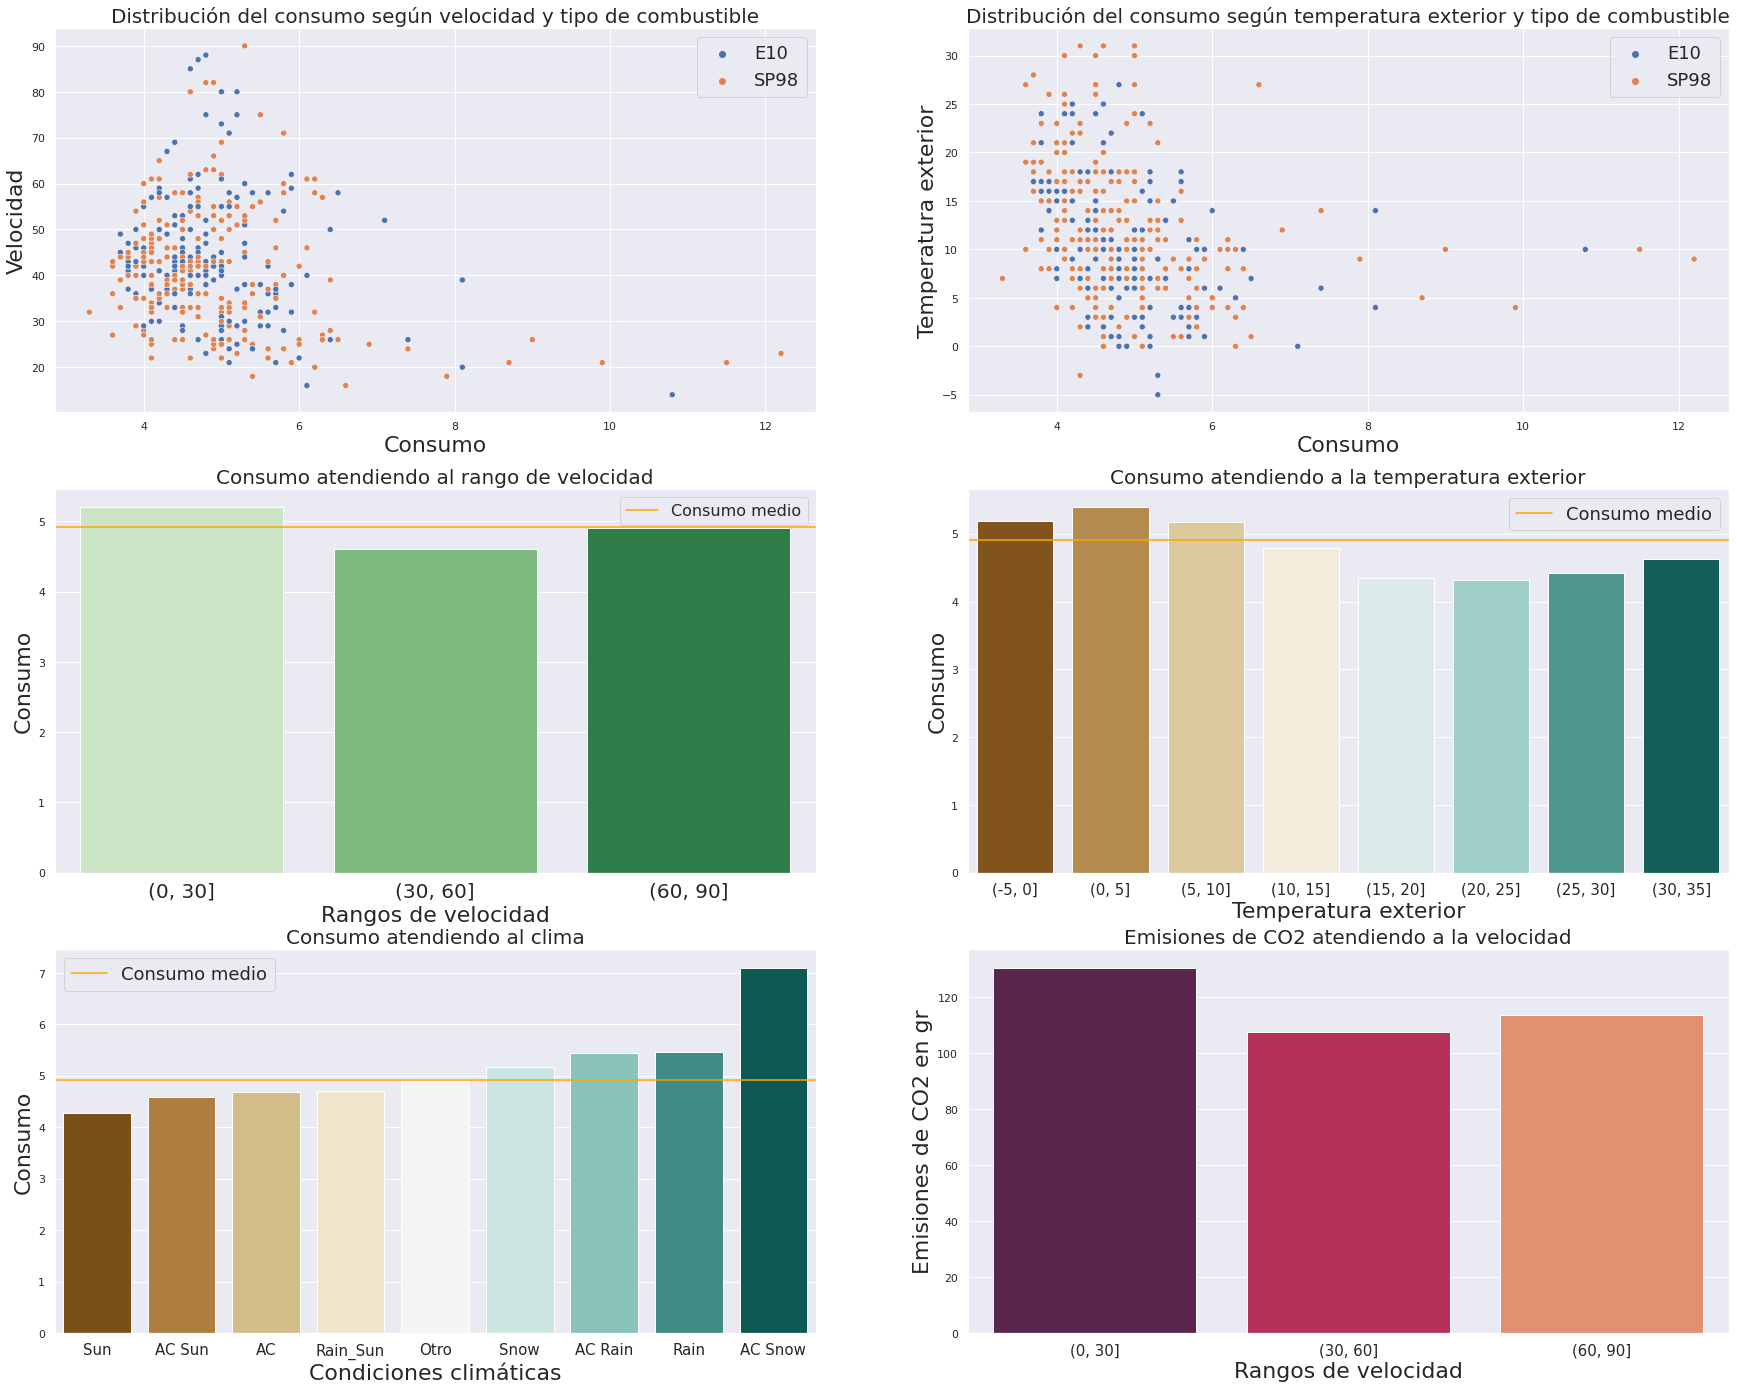

In [67]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 24))

mcv = sns.scatterplot(x = df.consume, y = df.speed, hue = df.gas_type, size_norm = (1,10), ax = axs[0,0])
mcv.set_xlabel("Consumo", fontsize = 22)
mcv.set_ylabel("Velocidad", fontsize = 22)
mcv.set_title("Distribución del consumo según velocidad y tipo de combustible", fontsize = 20)
mcv.legend(fontsize = 18)

mcto = sns.scatterplot(x = df.consume, y = df.temp_outside, hue = df.gas_type, size_norm = (1,10), ax = axs[0,1])
mcto.set_xlabel("Consumo", fontsize = 22)
mcto.set_ylabel("Temperatura exterior", fontsize = 22)
mcto.set_title("Distribución del consumo según temperatura exterior y tipo de combustible", fontsize = 20)
mcto.legend(fontsize = 18)

c_rango_s = sns.barplot(x = valores.index, y = valores.values, ax = axs[1,0], palette = 'Greens')
c_rango_s.set_xlabel("Rangos de velocidad", fontsize = 22)
c_rango_s.set_ylabel("Consumo", fontsize = 22)
c_rango_s.set_title("Consumo atendiendo al rango de velocidad", fontsize = 20)
c_rango_s.set_xticklabels(valores.index, fontdict = {'fontsize' : 20})
c_rango_s.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_rango_s.legend(fontsize = 16)

c_temp = sns.barplot(x = temperaturas.index, y = temperaturas.values, ax = axs[1,1], palette = 'BrBG')
c_temp.set_xlabel("Temperatura exterior", fontsize = 22)
c_temp.set_ylabel("Consumo", fontsize = 22)
c_temp.set_title("Consumo atendiendo a la temperatura exterior", fontsize = 20)
c_temp.set_xticklabels(temperaturas.index, fontdict = {'fontsize' : 15})
c_temp.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_temp.legend(fontsize = 18)

c_clima = sns.barplot(x = df_2.index, y = df_2.values, ax = axs[2,0], palette = 'BrBG')
c_clima.set_xlabel("Condiciones climáticas", fontsize = 22)
c_clima.set_ylabel("Consumo", fontsize = 22)
c_clima.set_title("Consumo atendiendo al clima", fontsize = 20)
c_clima.set_xticklabels(df_2.index, fontdict = {'fontsize' : 15})
c_clima.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_clima.legend(fontsize = 18)

c_clima = sns.barplot(x = emisiones.index, y = emisiones.values, ax = axs[2,1], palette = 'rocket')
c_clima.set_xlabel("Rangos de velocidad", fontsize = 22)
c_clima.set_ylabel("Emisiones de CO2 en gr", fontsize = 22)
c_clima.set_title("Emisiones de CO2 atendiendo a la velocidad", fontsize = 20)
c_clima.set_xticklabels(emisiones.index, fontdict = {'fontsize' : 15})

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

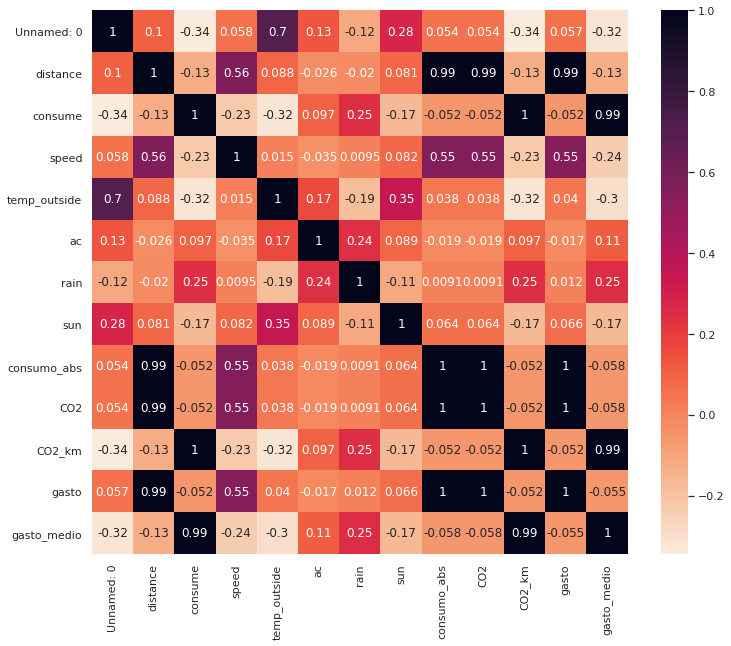

In [91]:
sns.set(rc={'figure.figsize' : (12, 10)})
print (type(df.corr()))
sns.heatmap(df.corr(), annot = True, cmap = sns.cm.rocket_r)

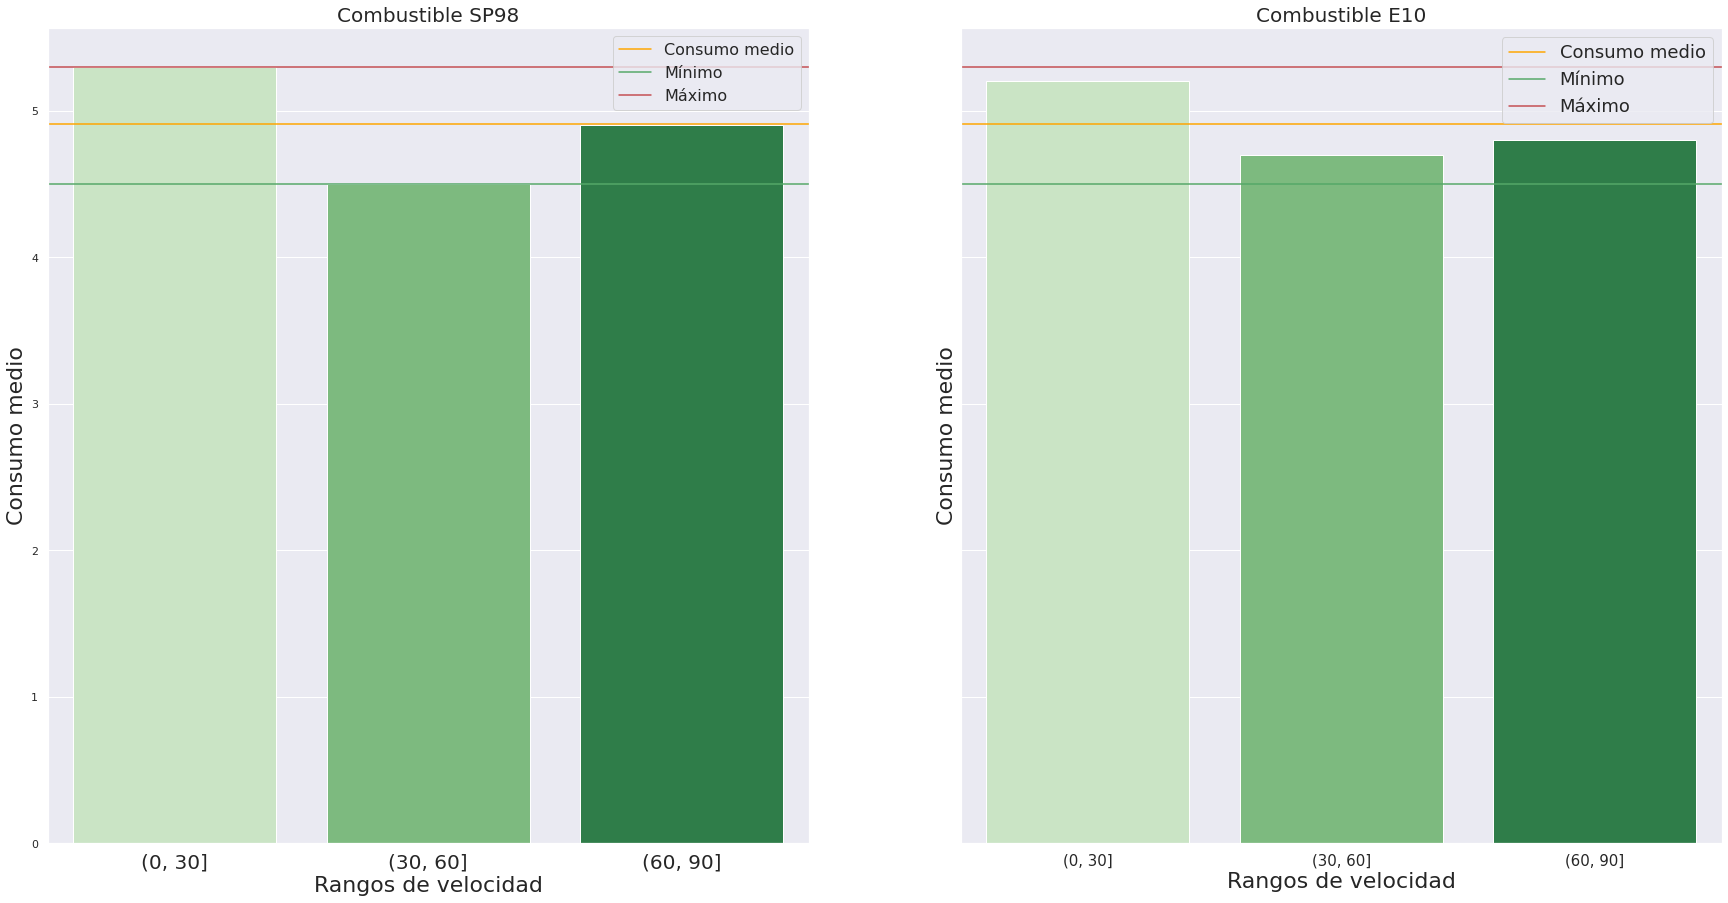

In [76]:
fig, ax2 = plt.subplots(ncols=2, figsize=(30, 15), sharey = True)

c_speed_98 = sns.barplot(x = SP98_gas.index, y = SP98_gas.values, ax = ax2[0], palette = 'Greens')
c_speed_98.set_xlabel("Rangos de velocidad", fontsize = 22)
c_speed_98.set_ylabel("Consumo medio", fontsize = 22)
c_speed_98.set_title("Combustible SP98", fontsize = 20)
c_speed_98.set_xticklabels(SP98_gas.index, fontdict = {'fontsize' : 20})
c_speed_98.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_speed_98.axhline(y=SP98_gas.min(), color="g", label = 'Mínimo')
c_speed_98.axhline(y=SP98_gas.max(), color="r", label = 'Máximo')
c_speed_98.legend(fontsize = 16)

c_speed_10 = sns.barplot(x = E10_gas.index, y = E10_gas.values, ax = ax2[1], palette = 'Greens')
c_speed_10.set_xlabel("Rangos de velocidad", fontsize = 22)
c_speed_10.set_ylabel("Consumo medio", fontsize = 22)
c_speed_10.set_title("Combustible E10", fontsize = 20)
c_speed_10.set_xticklabels(E10_gas.index, fontdict = {'fontsize' : 15})
c_speed_10.axhline(y=df.consume.mean(), color="orange", label = 'Consumo medio')
c_speed_10.axhline(y=SP98_gas.min(), color="g", label = 'Mínimo')
c_speed_10.axhline(y=SP98_gas.max(), color="r", label = 'Máximo')
c_speed_10.legend(fontsize = 18)

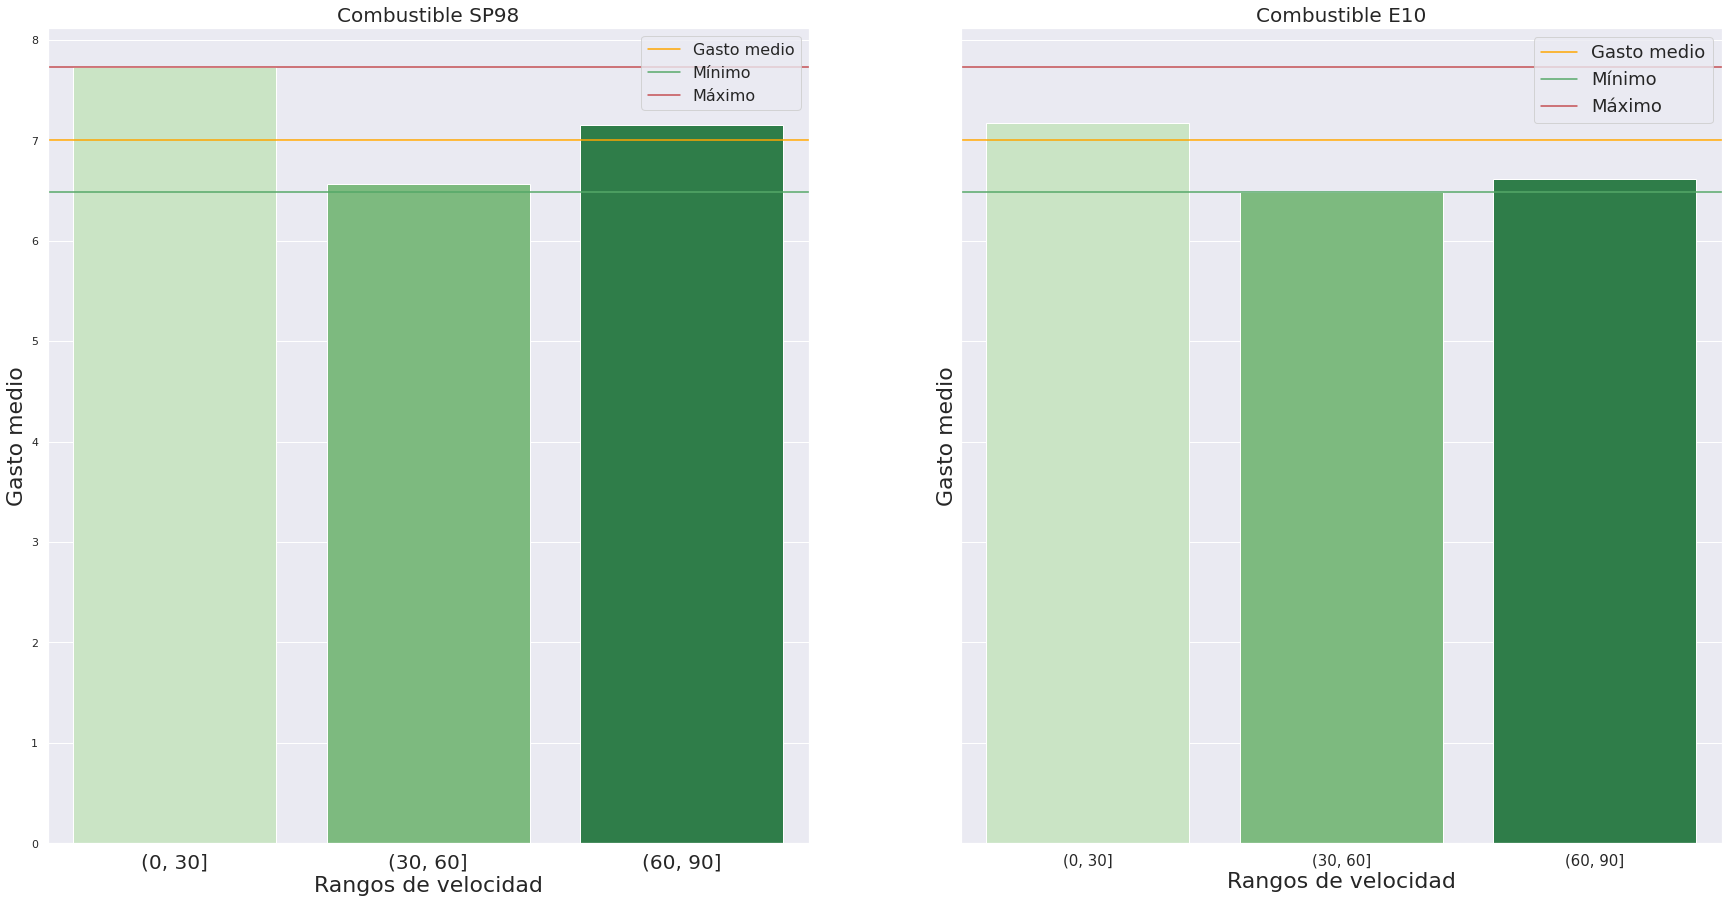

In [78]:
fig, ax2 = plt.subplots(ncols=2, figsize=(30, 15), sharey = True)

gm_speed_98 = sns.barplot(x = gastom_SP98_gas.index, y = gastom_SP98_gas.values, ax = ax2[0], palette = 'Greens')
gm_speed_98.set_xlabel("Rangos de velocidad", fontsize = 22)
gm_speed_98.set_ylabel("Gasto medio", fontsize = 22)
gm_speed_98.set_title("Combustible SP98", fontsize = 20)
gm_speed_98.set_xticklabels(gastom_SP98_gas.index, fontdict = {'fontsize' : 20})
gm_speed_98.axhline(y=df.gasto_medio.mean(), color="orange", label = 'Gasto medio')
gm_speed_98.axhline(y=gastom_E10_gas.min(), color="g", label = 'Mínimo')
gm_speed_98.axhline(y=gastom_SP98_gas.max(), color="r", label = 'Máximo')
gm_speed_98.legend(fontsize = 16)

gm_speed_10 = sns.barplot(x = gastom_E10_gas.index, y = gastom_E10_gas.values, ax = ax2[1], palette = 'Greens')
gm_speed_10.set_xlabel("Rangos de velocidad", fontsize = 22)
gm_speed_10.set_ylabel("Gasto medio", fontsize = 22)
gm_speed_10.set_title("Combustible E10", fontsize = 20)
gm_speed_10.set_xticklabels(gastom_E10_gas.index, fontdict = {'fontsize' : 15})
gm_speed_10.axhline(y=df.gasto_medio.mean(), color="orange", label = 'Gasto medio')
gm_speed_10.axhline(y=gastom_E10_gas.min(), color="g", label = 'Mínimo')
gm_speed_10.axhline(y=gastom_SP98_gas.max(), color="r", label = 'Máximo')
gm_speed_10.legend(fontsize = 18)

#### EL SIGUIENTE GRÁFICO NO TIENE EN CUENTA LA DISTANCIA RECORRIDA. ESTO NOS SIRVE PARA ENTENDER QUE NO PODEMOS USAR LOS DATOS ABSOLUTOS PARA HACER CUALQUIER TIPO DE REGRESIÓN.

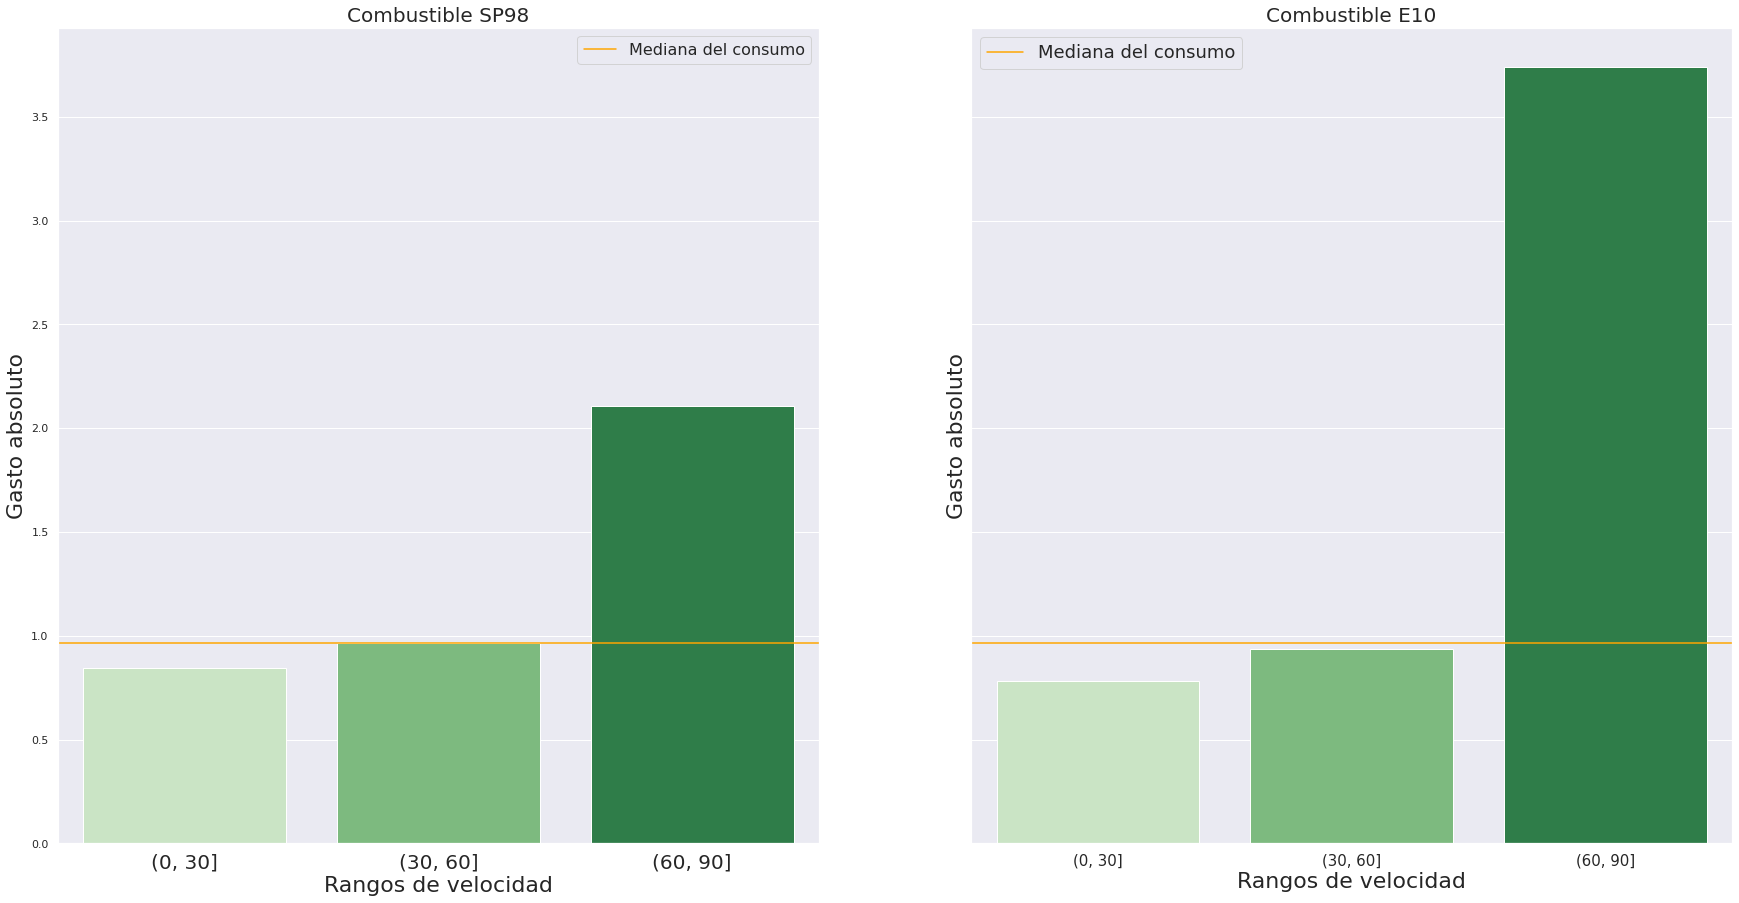

In [80]:
fig, ax2 = plt.subplots(ncols=2, figsize=(30, 15), sharey = True)

g_speed_98 = sns.barplot(x = gasto_SP98_gas.index, y = gasto_SP98_gas.values, ax = ax2[0], palette = 'Greens')
g_speed_98.set_xlabel("Rangos de velocidad", fontsize = 22)
g_speed_98.set_ylabel("Gasto absoluto", fontsize = 22)
g_speed_98.set_title("Combustible SP98", fontsize = 20)
g_speed_98.set_xticklabels(gasto_SP98_gas.index, fontdict = {'fontsize' : 20})
g_speed_98.axhline(y=df.gasto.median(), color="orange", label = 'Mediana del consumo')
#g_speed_98.axhline(y=gasto_SP98_gas.min(), color="g", label = 'Mínimo')
#g_speed_98.axhline(y=gasto_SP98_gas.max(), color="r", label = 'Máximo')
g_speed_98.legend(fontsize = 16)

g_speed_10 = sns.barplot(x = gasto_E10_gas.index, y = gasto_E10_gas.values, ax = ax2[1], palette = 'Greens')
g_speed_10.set_xlabel("Rangos de velocidad", fontsize = 22)
g_speed_10.set_ylabel("Gasto absoluto", fontsize = 22)
g_speed_10.set_title("Combustible E10", fontsize = 20)
g_speed_10.set_xticklabels(gasto_E10_gas.index, fontdict = {'fontsize' : 15})
g_speed_10.axhline(y=df.gasto.median(), color="orange", label = 'Mediana del consumo')
#g_speed_10.axhline(y=gasto_SP98_gas.min(), color="g", label = 'Mínimo')
#g_speed_10.axhline(y=gasto_SP98_gas.max(), color="r", label = 'Máximo')
g_speed_10.legend(fontsize = 18)

####  Plantéate hacer un plot de 4 diferenciando combustible

In [93]:
df[df.specials == 'AC Snow']

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,consumo_abs,CO2,CO2_km,speed_range,temp_o_range,gasto,gasto_medio
181,181,12.3,7.1,52,"22,5",0,AC Snow,E10,1,1,0,NaN,NaN,0.8733,2008.59,163.3,"(30, 60]","(-5, 0]",1.2043,9.7909


In [31]:
porcentaje = round((df.speed_range.value_counts(normalize=True)*100).sort_index(), 2)
porcentaje

(0, 30]     21.13
(30, 60]    70.62
(60, 90]     8.25
Name: speed_range, dtype: float64

In [39]:
porcentaje_SP98 = round((df.speed_range[df.gas_type == 'SP98'].value_counts(normalize=True)*100).sort_index(), 2)
porcentaje_SP98

(0, 30]     22.37
(30, 60]    70.18
(60, 90]     7.46
Name: speed_range, dtype: float64

In [40]:
porcentaje_E10 = round((df.speed_range[df.gas_type == 'E10'].value_counts(normalize=True)*100).sort_index(), 2)
porcentaje_E10

(0, 30]     19.38
(30, 60]    71.25
(60, 90]     9.38
Name: speed_range, dtype: float64

In [49]:
distancias = round((df.distance.groupby(df.speed_range).sum()), 2)
distancias

speed_range
(0, 30]      946.7
(30, 60]    4693.9
(60, 90]    1984.7
Name: distance, dtype: float64

In [50]:
distancias_SP98 = round((df.distance[df.gas_type == 'SP98'].groupby(df.speed_range).sum()), 2)
distancias_SP98

speed_range
(0, 30]      577.7
(30, 60]    2603.9
(60, 90]    1068.3
Name: distance, dtype: float64

In [51]:
distancias_E10 = round((df.distance[df.gas_type == 'E10'].groupby(df.speed_range).sum()), 2)
distancias_E10

speed_range
(0, 30]      369.0
(30, 60]    2090.0
(60, 90]     916.4
Name: distance, dtype: float64

In [54]:
df.distance[df.gas_type == 'E10'].sum()

3375.4

In [55]:
df.distance[df.gas_type == 'SP98'].sum()

4249.9

[Text(0, 0, '(0, 30]'), Text(1, 0, '(30, 60]'), Text(2, 0, '(60, 90]')]

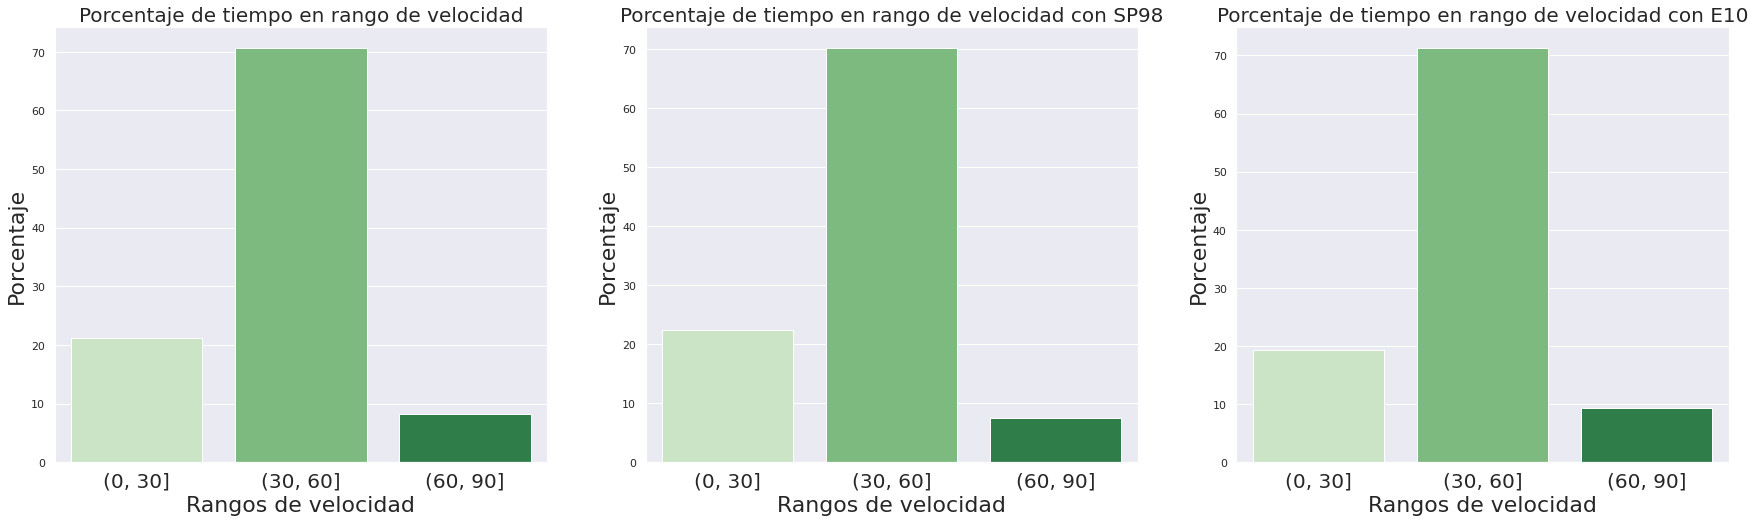

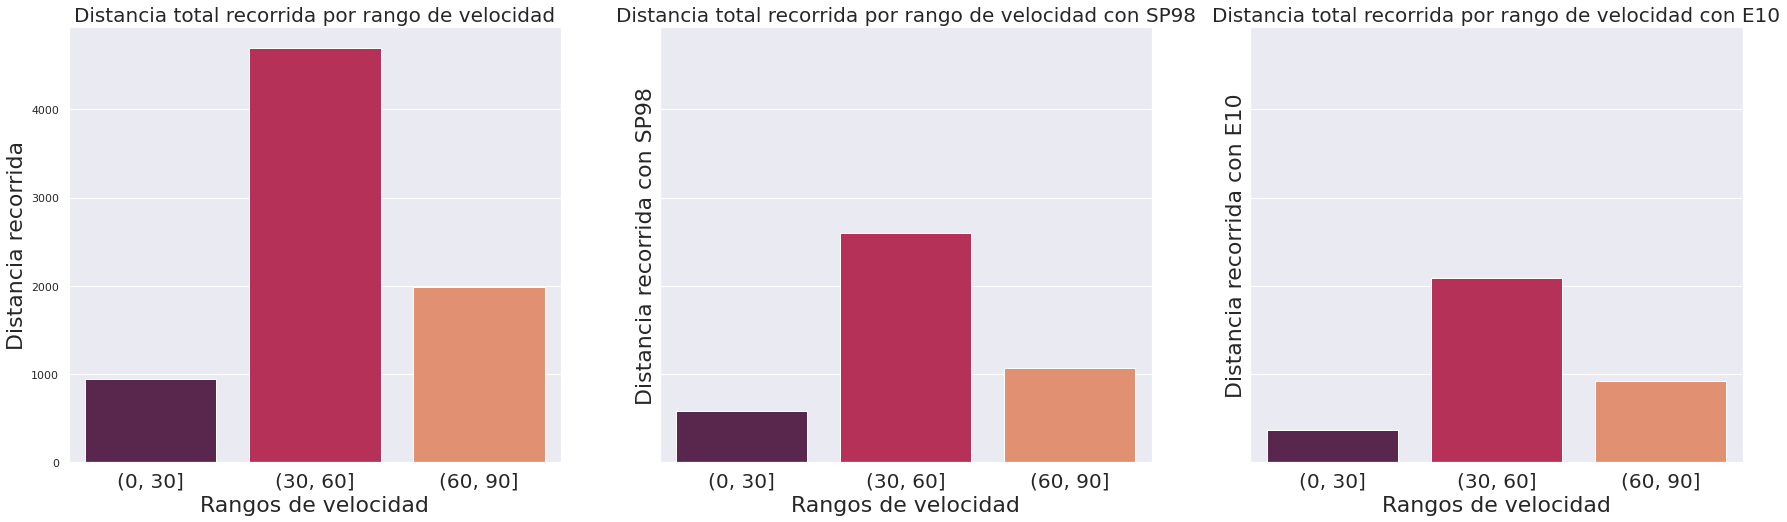

In [86]:
fig, ax3 = plt.subplots(ncols=3, figsize=(30, 8))

percent = sns.barplot(x = porcentaje.index, y = porcentaje.values, palette = 'Greens', ax = ax3[0])
percent.set_xlabel("Rangos de velocidad", fontsize = 22)
percent.set_ylabel("Porcentaje", fontsize = 22)
percent.set_title("Porcentaje de tiempo en rango de velocidad", fontsize = 20)
percent.set_xticklabels(porcentaje.index, fontdict = {'fontsize' : 20})

percent_SP98 = sns.barplot(x = porcentaje_SP98.index, y = porcentaje_SP98.values, palette = 'Greens', ax = ax3[1])
percent_SP98.set_xlabel("Rangos de velocidad", fontsize = 22)
percent_SP98.set_ylabel("Porcentaje", fontsize = 22)
percent_SP98.set_title("Porcentaje de tiempo en rango de velocidad con SP98", fontsize = 20)
percent_SP98.set_xticklabels(porcentaje_SP98.index, fontdict = {'fontsize' : 20})

percent_E10 = sns.barplot(x = porcentaje_E10.index, y = porcentaje_E10.values, palette = 'Greens', ax = ax3[2])
percent_E10.set_xlabel("Rangos de velocidad", fontsize = 22)
percent_E10.set_ylabel("Porcentaje", fontsize = 22)
percent_E10.set_title("Porcentaje de tiempo en rango de velocidad con E10", fontsize = 20)
percent_E10.set_xticklabels(porcentaje_E10.index, fontdict = {'fontsize' : 20})


fig2, ax4 = plt.subplots(ncols=3, figsize=(30, 8), sharey = True)

dist_total = sns.barplot(x = distancias.index, y = distancias.values, palette = 'rocket', ax = ax4[0])
dist_total.set_xlabel("Rangos de velocidad", fontsize = 22)
dist_total.set_ylabel("Distancia recorrida", fontsize = 22)
dist_total.set_title("Distancia total recorrida por rango de velocidad", fontsize = 20)
dist_total.set_xticklabels(porcentaje.index, fontdict = {'fontsize' : 20})

dist_total_SP98 = sns.barplot(x = distancias_SP98.index, y = distancias_SP98.values, palette = 'rocket', ax = ax4[1])
dist_total_SP98.set_xlabel("Rangos de velocidad", fontsize = 22)
dist_total_SP98.set_ylabel("Distancia recorrida con SP98", fontsize = 22)
dist_total_SP98.set_title("Distancia total recorrida por rango de velocidad con SP98", fontsize = 20)
dist_total_SP98.set_xticklabels(porcentaje_SP98.index, fontdict = {'fontsize' : 20})

dist_total_E10 = sns.barplot(x = distancias_E10.index, y = distancias_E10.values, palette = 'rocket', ax = ax4[2])
dist_total_E10.set_xlabel("Rangos de velocidad", fontsize = 22)
dist_total_E10.set_ylabel("Distancia recorrida con E10", fontsize = 22)
dist_total_E10.set_title("Distancia total recorrida por rango de velocidad con E10", fontsize = 20)
dist_total_E10.set_xticklabels(porcentaje_E10.index, fontdict = {'fontsize' : 20})